## Homework 3 - Welcome to the world of variable stars!

Modified from (Viviana Acquaviva (2023)) License: BSD-3-clause

#### Data description

The data we use for this homework are about stars. Our features are the so-called "colors", which give an indication of whether a star emits more blue, green, yellow, or red light. We are trying to predict whether a star is a special type of star called a RR-Lyrae variable star. So our target values will be yes/no (1/0 in the language of numpy arrays).

In [240]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_validate

plt.rc('font', size=12)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.rc('figure', titlesize=18)
plt.rc('figure',figsize=(8,6))

1\. Load the data for features and target from the appropriate files and save them as numpy arrays. (note: the default delimiter won't work, these are comma separated values!)

In [241]:
features=np.loadtxt('RRLyrae_features_small.txt',delimiter=',')
target=np.loadtxt('RRLyrae_labels_small.txt',delimiter=',')

In [242]:
features

array([[ 0.311,  0.714,  0.093,  0.204],
       [ 0.332,  0.965,  0.122,  0.032],
       [ 0.394,  1.019,  0.147,  0.096],
       ...,
       [ 0.212,  1.044,  0.035,  0.002],
       [ 0.172,  1.065,  0.042,  0.003],
       [ 0.065,  1.126, -0.017, -0.058]])

In [243]:
target

array([0., 0., 0., ..., 1., 1., 1.])

In [244]:
print("Features data type:",features.dtype)
print("Target data type:",target.dtype)

Features data type: float64
Target data type: float64


In [245]:
target=target.astype(np.int64)
print(target)

[0 0 0 ... 1 1 1]


2\. Answer the following questions:

Is this a classification or regression problem?

Is this supervised or unsupervised learning?

How many instances are in this data set? 

How many features? 

How many RR Lyrae stars (i.e., examples of the positive class) are in the data set? 

What would be the accuracy of a classifier that classifies all objects in the data set as non-RR Lyrae?


#### This is a classification problem. We are trying to predict whether or not a star is a RR-Lyrae variable star, which involves assigning a label 1 (yes) or 0 (no) to each instance.

#### This is supervised learning since the colors (features) are used to predict whether or not the star is a RR-Lyrae variable star (label).

In [246]:
print('There are:',features.shape[0],'instances')
print('There are:',features.shape[1],'features')
print('There are:',sum(target==1),'RR Lyrae stars')
print('A lazy classifier would have an accuracy of %.3f ' % (sum(target==0)/len(target)))

There are: 2483 instances
There are: 4 features
There are: 483 RR Lyrae stars
A lazy classifier would have an accuracy of 0.805 


3\. Use a Decision Tree Classifier, and implement k-fold cross validation algorithm.

#### I will use Stratified k-fold cross-validation since the class distribution is imbalanced, as there are only 483 RR-Lyrae variable stars in a dataset with 2483 instances.

In [247]:
dt_model = DecisionTreeClassifier()

cv=StratifiedKFold()

scores=cross_validate(dt_model, features, target)

4\. Report the scores, and calculate the mean and standard deviation of the scores vector. 

In [248]:
i=1
for score in scores['test_score']:
    print('Score for fold %.0f : %.3f'%(i,score))
    i+=1

print('\nMean score: %.3f' % np.mean(scores['test_score']))
print('Standard deviation of score: %.3f' % np.std(scores['test_score']))

Score for fold 1 : 0.954
Score for fold 2 : 0.974
Score for fold 3 : 0.962
Score for fold 4 : 0.982
Score for fold 5 : 0.964

Mean score: 0.967
Standard deviation of score: 0.010


5\. As in lab 5-6, compute the confusion matrix for your model. To generate the predictions, you can use the "cross_val_predict" function. Please write your own code before using any scikit learn builtin functions, but you can use ConfusionMatrixDisplay to visualize.

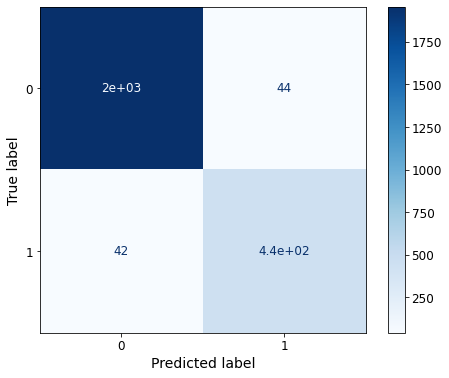

In [249]:
def my_confusion_matrix(y_true, y_pred):
    mat=np.zeros((2,2))
    mat[1,1] = int(np.sum((y_true == 1) & (y_pred == 1)))
    mat[0,0] = int(np.sum((y_true == 0) & (y_pred == 0)))
    mat[0,1] = int(np.sum((y_true == 0) & (y_pred == 1)))
    mat[1,0] = int(np.sum((y_true == 1) & (y_pred == 0)))
    return mat

dt_model=DecisionTreeClassifier()
y_pred=cross_val_predict(dt_model,features,target,cv=cv)

my_confusion=my_confusion_matrix(target,y_pred)

ConfusionMatrixDisplay(my_confusion).plot(cmap=plt.cm.Blues)

6\. Based on the confusion matrix, how many true positive, true negative, false positive, false negative instances do you have?

In [250]:
tn,fp,fn,tp=my_confusion[0,0],my_confusion[0,1],my_confusion[1,0],my_confusion[1,1]
print(tp,'true positives,',fp,'false positives,',fn,'false negatives,',tn,'true negatives.')

441.0 true positives, 44.0 false positives, 42.0 false negatives, 1956.0 true negatives.


7\. Calculate accuracy, precision and recall. Plese write out your steps and do not use built-in functions. 

In [251]:
acc=(tn+tp)/(tn+fp+tp+fn)
prec=(tp)/(tp+fp)
rec=(tp)/(tp+fn)
print('Accuracy is: %.3f, precision is: %.3f, recall is: %.3f' % (acc,prec,rec))

Accuracy is: 0.965, precision is: 0.909, recall is: 0.913


8\. Which evaluation metric is used by the cross validation score in 4.? [To answer this question, you might need to check out the description of the function]. Given the distribution of classes in your data set, do you see a possible issue?

#### Accuracy is used, this is an issue here since as mentioned in part 3, the class distribution here is imbalanced, hence a 'lazy' classifier could have high accuracy even though it will always predict the majority class, providing little value in terms of identifying the minority class.

9\. To compare performance for now, let's use the F1 score, a weighted average of precision and recall.

F1 = 2 * (precision * recall) / (precision + recall)

Find out how to use the f1 score (instead of accuracy) as an optional argument of the cross_validate function and report the mean and standard deviation of the scores associated to this evaluation metric.


In [252]:
scores=cross_validate(dt_model, features, target)
f1_scores=cross_validate(dt_model,features,target,cv=cv,scoring='f1',return_train_score=True)

i=1
for te_score in f1_scores['test_score']:
    print('F1 score for fold %.0f : %.3f'%(i,te_score))

print('\nMean F1 score: %.3f' % np.mean(f1_scores['test_score']))
print('\nStandard deviation of F1 score: %.3f' % np.std(f1_scores['test_score']))

F1 score for fold 1 : 0.883
F1 score for fold 1 : 0.939
F1 score for fold 1 : 0.894
F1 score for fold 1 : 0.960
F1 score for fold 1 : 0.903

Mean F1 score: 0.916

Standard deviation of F1 score: 0.029


10\. It is now time to look at some diagnostics. Use the cross_validate function with 'return_train_score = True'. Compare the f1 train and test scores obtained by your model. Based on this result, do you think your algorithm suffers from high variance or high bias and why?

In [253]:
scores=cross_validate(dt_model, features, target)
f1_scores=cross_validate(dt_model,features,target,cv=cv,scoring='f1',return_train_score=True)

i=1
for te_score,tr_score in zip(f1_scores['test_score'],f1_scores['train_score']):
    print('Test score for fold %.0f : %.3f and train score %.3f'%(i,te_score,tr_score))

print('\nMean test score: %.3f' % np.mean(f1_scores['test_score']))
print('Mean train score: %.3f' % np.mean(f1_scores['train_score']))

print('\nStandard deviation of test score: %.3f' % np.std(f1_scores['test_score']))
print('Standard deviation of train score: %.3f' % np.std(f1_scores['train_score']))

Test score for fold 1 : 0.877 and train score 1.000
Test score for fold 1 : 0.935 and train score 1.000
Test score for fold 1 : 0.899 and train score 1.000
Test score for fold 1 : 0.954 and train score 1.000
Test score for fold 1 : 0.882 and train score 1.000

Mean test score: 0.909
Mean train score: 1.000

Standard deviation of test score: 0.030
Standard deviation of train score: 0.000


#### The model appears to suffer from high variance, or overfitting, since it fits the training data too closely (perfectly in this case), while the test data has a lower score. The test scores are still high regardless, indicating low bias.

11\. Finally, we can look at learning curves as in lab 5-6.  Based on what you see in the plot, do you think getting more training data would help? Justify your answer.



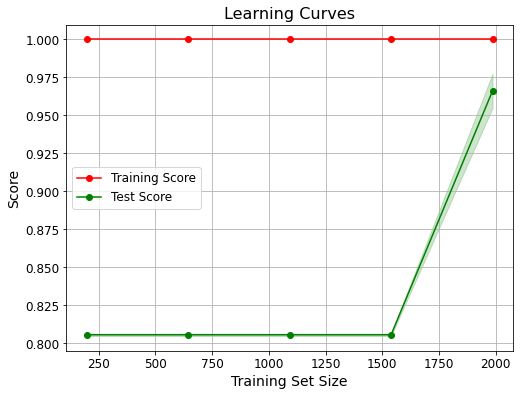

In [254]:
train_sizes,train_scores,test_scores=learning_curve(dt_model,features,target,cv=cv)

test_mean=np.mean(test_scores,axis=1)
train_mean=np.mean(train_scores,axis=1)
test_std=np.std(test_scores,axis=1)
train_std=np.std(train_scores,axis=1)

plt.plot(train_sizes,train_mean,label='Training Score',c='r',marker='o')
plt.plot(train_sizes,test_mean,label='Test Score',c='g',marker='o')
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color='green',alpha=0.2)
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,color='red',alpha=0.2)


plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)


#### Both give high scores however the training score is higher than the test score, which suggests a level of overfitting. Getting more training data could help here due to the overfitting, this can be seen since the test score improves with increasing training set size (above ~1,500 instances).